# Get street from Longitude and Latitude  

In [1]:
# pip install geopy

In [2]:
import pandas as pd
import json

from geopy.geocoders import Nominatim

GeoLocator = Nominatim(user_agent='https')

In [3]:
# location = GeoLocator.reverse("32.07938, 34.78139")

# print(location.raw)

### Loading BP 

In [4]:
from shapely.geometry import Point
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
bicycle_paths

,oidshvil,msorech,dateimport,width,direction,bitzua,shemmikta,miflas,datecreate,geometry
0,1.0,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012.0,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140..."
1,2.0,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013.0,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123..."
2,3.0,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004.0,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123..."
3,4.0,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018.0,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122..."
4,5.0,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018.0,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122..."
...,...,...,...,...,...,...,...,...,...,...
853,452.0,172.22,11/02/2024 00:31:49,1.5,None,2016.0,הגדוד העברי מללוינסקי עד צ'לנוב,None,None,"LINESTRING (34.77990 32.05691, 34.77964 32.057..."
854,453.0,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023.0,נמיר מרוקח עד חיים לבנון,כביש,None,"LINESTRING (34.79361 32.10025, 34.79356 32.100..."
855,454.0,24.93,11/02/2024 00:31:49,NaN,None,NaN,None,None,None,"LINESTRING (34.77309 32.08740, 34.77284 32.08746)"
856,455.0,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022.0,גשר רדינג ווקוף,כביש,None,"LINESTRING (34.77632 32.10170, 34.77628 32.101..."


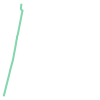

In [5]:
bicycle_paths.iloc[2,-1]

In [6]:
bicycle_paths.iloc[840:841]

,oidshvil,msorech,dateimport,width,direction,bitzua,shemmikta,miflas,datecreate,geometry
840,440.0,2210.57,11/02/2024 00:31:49,2.5,חד סטרי,2023.0,אבן גבירול החדש/2040 מפרופס עד יוניצ'מן גדה מז...,כביש,None,"LINESTRING (34.78899 32.12381, 34.78904 32.123..."


In [7]:
line_string = bicycle_paths.iloc[0,-1]

specific_point = line_string.coords[0]
specific_point
# And if you want it as a Point object
# specific_point_as_point = Point(specific_point)
# specific_point_as_point

(34.80054067550826, 32.14000187424299)

In [8]:
bp_linestring_length = []

for line_string in bicycle_paths.geometry:
    bp_linestring_length.append(len(line_string.coords.xy[0]))

In [9]:
s_bp_linestring_length = pd.Series(bp_linestring_length)
s_bp_linestring_length.min(), s_bp_linestring_length.max(), s_bp_linestring_length.median(),s_bp_linestring_length.quantile(0.25), s_bp_linestring_length.quantile(0.75)

(2, 144, 5.0, 2.0, 11.0)

In [10]:
# # Making sure the start of the BP and the end of the BP are both on the same street.
# import time
# # time.sleep(5.5)
# bp_roads = []
# for line_string in bicycle_paths.geometry:
    
#     start_lat, start_long   = line_string.coords[0]
#     start_coords            = (start_long, start_lat)
    
#     middle = int(len(line_string.coords.xy[0])/2)
#     middle_lat, middle_long  = line_string.coords[middle]
#     middle_coords            = (middle_long, middle_lat)

#     end_lat, end_long   = line_string.coords[-1]
#     end_coords          = (end_long, end_lat)

#     time.sleep(1)
#     start_location = GeoLocator.reverse(start_coords)

#     time.sleep(1)
#     middle_location = GeoLocator.reverse(middle_coords)

#     time.sleep(1)
#     end_location   = GeoLocator.reverse(end_coords)

#     start_road     = start_location.raw['address']
#     middle_road    = middle_location.raw['address']
#     end_road       = end_location.raw['address']
#     bp_roads.append((start_road,middle_road, end_road))
    
    
    

KeyboardInterrupt: 

In [ ]:

# # Writing list to a file, each element as a JSON object
# with open('bp_list_streets.txt', 'w') as file:
#     for item in bp_roads:
#         # Convert each dictionary to a JSON string and write it to the file
#         json_string = json.dumps(item)
#         file.write(json_string + '\n')

In [11]:
my_list = []

# Reading each line from the file, parsing it as JSON
with open('bp_list_streets.txt', 'r') as file:
    for line in file:
        # Each line is a JSON object, so we parse it
        item = json.loads(line)
        # Append the dictionary to the list
        my_list.append(item)

# Now, my_list contains each dictionary that was originally written to the file
print(my_list)

[[{'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}, {'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}, {'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}], [{'road': 'צבי פרופס', 'residential': 'תל אביב - יפו', 'suburb': 'צוקי אביב', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '6946032', 'country': 'ישראל', 'country_code': 'il'}, {'ro

### Now need to make sure that all the streets are the same
If not the same, I will have to think of some other method, maybe distance.

In [ ]:
my_list[0]

[{'road': 'דרך נמיר',
  'residential': 'תל אביב - יפו',
  'suburb': 'גלילות',
  'city': 'תל אביב-יפו',
  'state_district': 'נפת תל אביב',
  'state': 'מחוז תל אביב',
  'ISO3166-2-lvl4': 'IL-TA',
  'postcode': '4672415',
  'country': 'ישראל',
  'country_code': 'il'},
 {'road': 'דרך נמיר',
  'residential': 'תל אביב - יפו',
  'suburb': 'גלילות',
  'city': 'תל אביב-יפו',
  'state_district': 'נפת תל אביב',
  'state': 'מחוז תל אביב',
  'ISO3166-2-lvl4': 'IL-TA',
  'postcode': '4672415',
  'country': 'ישראל',
  'country_code': 'il'},
 {'road': 'דרך נמיר',
  'residential': 'תל אביב - יפו',
  'suburb': 'גלילות',
  'city': 'תל אביב-יפו',
  'state_district': 'נפת תל אביב',
  'state': 'מחוז תל אביב',
  'ISO3166-2-lvl4': 'IL-TA',
  'postcode': '4672415',
  'country': 'ישראל',
  'country_code': 'il'}]

In [12]:
i = 0

for item in my_list:
    start_info, middle_info, end_info = item
    print(i)
    print('start')
    print(start_info)
    print('middle')
    print(middle_info)
    print('end')
    print(end_info)
    print('++++++++++++++++++++++++++++++++')
    print()
    # if ('road' in start_info.keys() ) and ('road' in end_info.keys()):
    #     if start_info['road'] != end_info['road']:
    #         print('no match', i)
    #         print('start')
    #         print(start_info)
    #         print('middle')
    #         print(middle_info)
    #         print('end')
    #         print(end_info)
    #         print('++++++++++++++++++++++++++++++++')
    #         print()
    # else:
    #     print('no road', i)
    #     print('start')
    #     print(start_info)
    #     print('middle')
    #     print(middle_info)
    #     print('end')
    #     print(end_info)
    #     print('-------------------------------')
    #     print()

    i += 1

0
start
{'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}
middle
{'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}
end
{'road': 'דרך נמיר', 'residential': 'תל אביב - יפו', 'suburb': 'גלילות', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '4672415', 'country': 'ישראל', 'country_code': 'il'}
++++++++++++++++++++++++++++++++

1
start
{'road': 'צבי פרופס', 'residential': 'תל אביב - יפו', 'suburb': 'צוקי אביב', 'city': 'תל אביב-יפו', 'state_district': 'נפת תל אביב', 'state': 'מחוז תל אביב', 'ISO3166-2-lvl4': 'IL-TA', 'postcode': '694

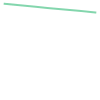

In [ ]:

bicycle_paths.iloc[857, -1]

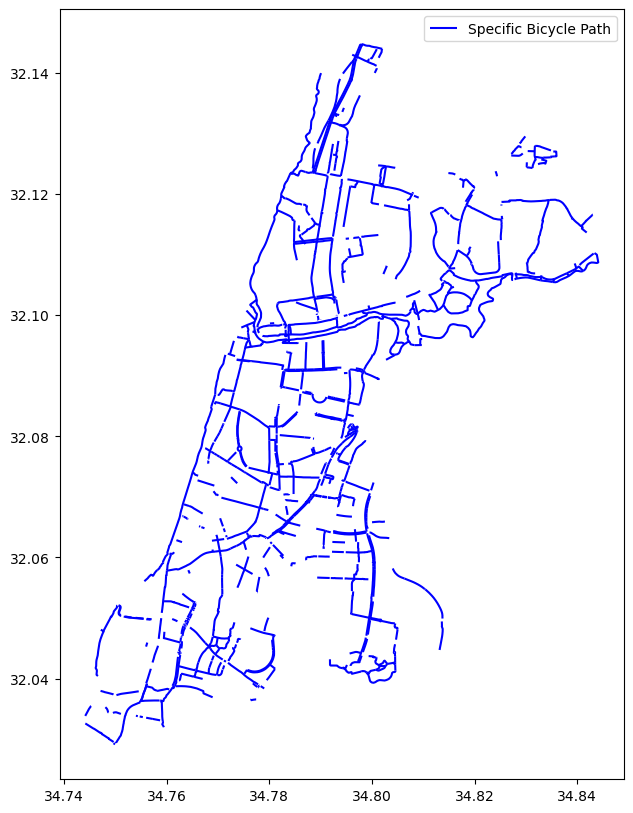

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot all bike paths for context
bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')

# Plot accidents

# Plot the filtered accidents

plt.legend()
plt.show()